1) 원하는 지하철 역의 이름을 입력해주세요 : 1호선 서울역


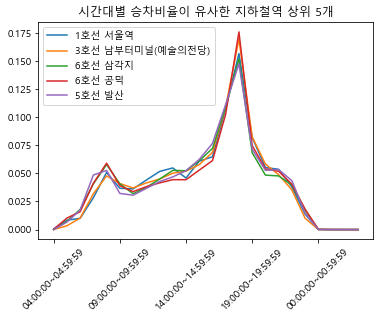

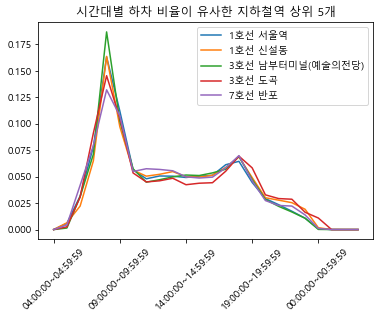

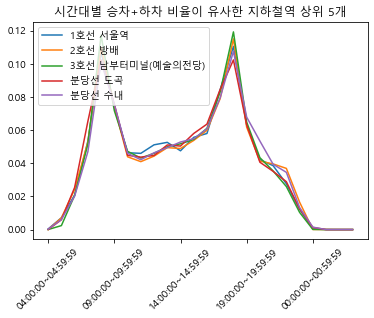

In [11]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt

plt.rc('font', family = 'Malgun Gothic')

df = pd.read_csv('C:/Users/acer/subway_time.csv', encoding = 'cp949', index_col = 0)

df.index = df.index.map(str) +" "+ df['지하철역'].map(str) # 호선명과 지하철역을 합침
df = df.drop(['지하철역'], axis = 1) # 지하철역 삭제

name = input("1) 원하는 지하철 역의 이름을 입력해주세요 : ")

df = df[1:] # 승하차 행 제거
df = df.astype(str).astype(int) # 형변환


df_1 = df.iloc[:, [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46]] # 전체승차
df_2 = df.iloc[:, [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47]] # 전체하차

df_2.columns = df_1.columns # 칼럼 추가

df_1_s = df_1.sum(axis = 1) # 전체 승차 인원을 알기 위해 더함
df_1 = df_1.div(df_1_s, axis = 0) # 승차 비율 구함

df_2_s = df_2.sum(axis = 1) # 전체 하차 인원을 알기 위해 더함
df_2 = df_2.div(df_2_s, axis = 0) # 하차 비율 구함


df_3 = df_1 + df_2 # 승하차 더하기

df_3_s = df_3.sum(axis = 1) # 전
df_3 = df_3.div(df_3_s, axis = 0)


df_subway_1 = df_1[df_1.index == name] # 원하는 지하철 역의 승차
df_subway_2 = df_2[df_2.index == name] # 원하는 지하철 역의 하차
df_subway = df_3[df_3.index == name] # 원하는 지하철 역의 승+하차

#시간대별 승차 비율이 유사한 지하철 상위 5개
x_1 = df_1.sub(df_subway_1.iloc[0], axis = 1)
y_1 = np.power(x_1, 2)
z_1 = y_1.sum(axis = 1).sort_values()

i_1 = z_1.sort_values().index[:5]

df_1.loc[i_1].T.plot()

plt.xticks(rotation=45)
plt.title('시간대별 승차비율이 유사한 지하철역 상위 5개')
plt.show()



df_2.dropna(axis = 0, inplace = True)
#시간대별 하차 비율이 유사한 지하철 상위 5개
x_2 = df_2.sub(df_subway_2.iloc[0], axis = 1)
y_2 = np.power(x_2, 2)
z_2 = y_2.sum(axis = 1).sort_values()

i_2 = z_2.sort_values().index[:5]

df_2.loc[i_2].T.plot()

plt.xticks(rotation=45)
plt.title('시간대별 하차 비율이 유사한 지하철역 상위 5개')
plt.show()

df_3.dropna(axis = 0, inplace = True)
#시간대별 승차+하차 비율이 유사한 지하철역 상위 5개
x_3 = df_3.sub(df_subway.iloc[0], axis = 1)
y_3 = np.power(x_3, 2)
z_3 = y_3.sum(axis = 1).sort_values()

i_3 = z_3.sort_values().index[:5]

df_3.loc[i_3].T.plot()

plt.xticks(rotation=45)
plt.title('시간대별 승차+하차 비율이 유사한 지하철역 상위 5개')
plt.show()
